In [3]:
## analyse the data
import mne
import numpy as np

In [39]:
raw=mne.io.read_raw_gdf('BCICIV_2a_gdf/A04T.gdf',
                         eog=['EOG-left', 'EOG-central', 'EOG-right'])
raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])

Extracting EDF parameters from C:\Users\uabhi\NEW_MY_JUPYTER\BCI\BCI 4 dataset\BCICIV_2a_gdf\A04T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...


C:\Users\uabhi\anaconda3\envs\tf\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\uabhi\anaconda3\envs\tf\lib\contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


<RawGDF | A04T.gdf, 22 x 600915 (2403.7 s), ~26 kB, data not loaded>

In [45]:
raw.annotations.delete()

,onset,duration,description
0,2004-11-08 12:00:00.000,0.004,32766
1,2004-11-08 12:00:00.000,79.616,1072
2,2004-11-08 12:01:19.620,0.004,32766
3,2004-11-08 12:01:21.020,7.500,768
4,2004-11-08 12:01:23.020,1.252,772
...,...,...,...
605,2004-11-08 12:39:41.056,1.252,769
606,2004-11-08 12:39:47.512,7.500,768
607,2004-11-08 12:39:49.512,1.252,770
608,2004-11-08 12:39:55.748,7.500,768


In [48]:
events, event_id=mne.events_from_annotations(raw)
event_id

Used Annotations descriptions: ['1023', '1072', '32766', '768', '769', '770', '771', '772']


{'1023': 1,
 '1072': 2,
 '32766': 3,
 '768': 4,
 '769': 5,
 '770': 6,
 '771': 7,
 '772': 8}

In [62]:
ann = event_id.keys()
ann = list(map(int,ann))
ids = event_id.values()
ids = list(ids)

In [63]:
print(ann)
print(ids)

[1023, 1072, 32766, 768, 769, 770, 771, 772]
[1, 2, 3, 4, 5, 6, 7, 8]


In [70]:
unq = np.unique(events[:,-1])

In [72]:
events[:,-1]

array([3, 2, 3, 4, 8, 4, 8, 4, 5, 4, 8, 4, 5, 4, 5, 4, 8, 4, 8, 4, 8, 4,
       6, 4, 8, 4, 5, 4, 5, 4, 6, 4, 6, 4, 6, 4, 7, 4, 5, 4, 7, 4, 6, 4,
       7, 4, 6, 4, 5, 4, 7, 4, 7, 4, 5, 4, 7, 4, 6, 4, 6, 4, 8, 4, 5, 4,
       7, 4, 5, 4, 7, 4, 6, 4, 8, 4, 7, 4, 6, 4, 6, 4, 7, 4, 5, 4, 1, 5,
       4, 8, 4, 7, 4, 8, 4, 6, 4, 7, 4, 8, 3, 4, 7, 4, 6, 4, 6, 4, 5, 4,
       6, 4, 8, 4, 7, 4, 5, 4, 8, 4, 5, 4, 7, 4, 8, 4, 5, 4, 6, 4, 8, 4,
       7, 4, 1, 5, 4, 5, 4, 7, 4, 8, 4, 6, 4, 5, 4, 7, 4, 5, 4, 6, 4, 6,
       4, 5, 4, 1, 5, 4, 6, 4, 8, 4, 6, 4, 7, 4, 6, 4, 8, 4, 8, 4, 8, 4,
       5, 4, 7, 4, 6, 4, 7, 4, 1, 6, 4, 8, 4, 7, 4, 8, 4, 8, 4, 7, 4, 5,
       4, 7, 3, 4, 5, 4, 6, 4, 6, 4, 5, 4, 6, 4, 5, 4, 6, 4, 7, 4, 6, 4,
       8, 4, 5, 4, 7, 4, 6, 4, 5, 4, 8, 4, 8, 4, 8, 4, 8, 4, 8, 4, 5, 4,
       7, 4, 6, 4, 5, 4, 5, 4, 7, 4, 8, 4, 5, 4, 7, 4, 7, 4, 7, 4, 5, 4,
       6, 4, 5, 4, 6, 4, 6, 4, 1, 5, 4, 6, 4, 7, 4, 6, 4, 7, 4, 1, 7, 4,
       8, 4, 7, 4, 7, 4, 8, 4, 8, 4, 8, 4, 8, 3, 4,

In [75]:
for u in unq:
    events[:,-1] = np.where(events[:,-1]== u , ann[u-1],events[:,-1])

In [77]:
events[:,-1]

array([32766,  1072, 32766,   768,   772,   768,   772,   768,   769,
         768,   772,   768,   769,   768,   769,   768,   772,   768,
         772,   768,   772,   768,   770,   768,   772,   768,   769,
         768,   769,   768,   770,   768,   770,   768,   770,   768,
         771,   768,   769,   768,   771,   768,   770,   768,   771,
         768,   770,   768,   769,   768,   771,   768,   771,   768,
         769,   768,   771,   768,   770,   768,   770,   768,   772,
         768,   769,   768,   771,   768,   769,   768,   771,   768,
         770,   768,   772,   768,   771,   768,   770,   768,   770,
         768,   771,   768,   769,   768,  1023,   769,   768,   772,
         768,   771,   768,   772,   768,   770,   768,   771,   768,
         772, 32766,   768,   771,   768,   770,   768,   770,   768,
         769,   768,   770,   768,   772,   768,   771,   768,   769,
         768,   772,   768,   769,   768,   771,   768,   772,   768,
         769,   768,

**From the paper**  
'1023': 1 (Rejected trial),   
 '1072': 2 (Eye movements),  
 '276':  3 (eyes open)),  
 '277':  4 (eyes closed),   
 '32766':5 (Start of a new run),  
 '768':  6 (Start of a trial),  
 '769': 7 (class 1),  
 '770': 8 (class 2),  
 '771': 9 (class 3),  
 '772': 10 (class 4)



In [27]:
event_dict={
 'reject':1,
 'eye move':2,
 'eye open':3,
 'eye close':4,
 'new run':5,
 'new trial':6,
 'class 1':7,
 'class 2':8,
 'class 3':9,
 'class 4':10,

}

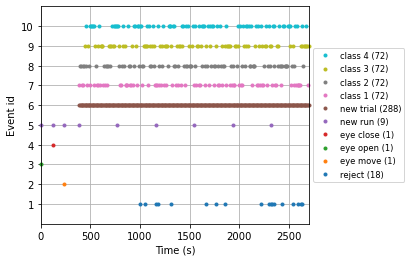

In [28]:
#https://mne.tools/stable/auto_tutorials/intro/10_overview.html#sphx-glr-auto-tutorials-intro-10-overview-py
fig = mne.viz.plot_events(events[0], event_id=event_dict, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp)

In [29]:
epochs = mne.Epochs(raw, events[0], event_id=[7],tmin= -0.1, tmax=0.7, preload=True)

Not setting metadata
72 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 72 events and 201 original time points ...
0 bad epochs dropped


In [18]:
epochs.get_data().shape

(288, 22, 201)

In [19]:
label=epochs.events[:,-1]
len(label)

288

In [20]:
#epoch vs evoked

In [21]:
evoked_0 = epochs['7'].average()
evoked_1 = epochs['8'].average()
evoked_2 = epochs['9'].average()
evoked_3 = epochs['10'].average()

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


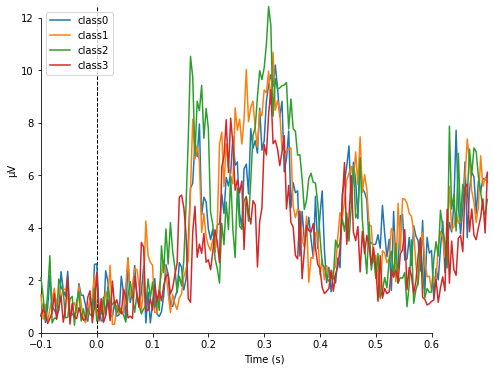

[<Figure size 576x432 with 1 Axes>]

In [22]:
#left,right,foot,tongue
dicts={'class0':evoked_0,'class1':evoked_1,'class2':evoked_2,'class3':evoked_3}
mne.viz.plot_compare_evokeds(dicts)

# let create a function

In [23]:
def read_data(path):
    raw=mne.io.read_raw_gdf(path,preload=True,
                          eog=['EOG-left', 'EOG-central', 'EOG-right'])
    raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])
    raw.set_eeg_reference()
    events=mne.events_from_annotations(raw)
    epochs = mne.Epochs(raw, events[0], event_id=[7,8,9,10],on_missing ='warn')
    labels=epochs.events[:,-1]
    features=epochs.get_data()
    return features,labels

In [26]:
%%capture
features,labels,groups=[],[],[]
for i in range(1,10):
    feature,label=read_data(f'BCICIV_2a_gdf/A0{i}T.gdf')
    features.append(feature)
    labels.append(label)
    groups.append([i]*len(label))


In [29]:
features=np.concatenate(features)
labels=np.concatenate(labels)
groups=np.concatenate(groups)

features.shape,labels.shape,groups.shape

((2448, 22, 176), (2448,), (2448,))

In [37]:
np.isnan(features).sum()

0

In [33]:
unique, counts = np.unique(labels, return_counts=True)
unique, counts

(array([ 7,  8,  9, 10]), array([648, 648, 576, 576], dtype=int64))

In [35]:
unique, counts = np.unique(groups, return_counts=True)
unique, counts

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([288, 288, 288, 144, 288, 288, 288, 288, 288], dtype=int64))